In [99]:
import warnings
import itertools
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import pmdarima as pm
from pmdarima.model_selection import train_test_split
from   datetime import  datetime, timedelta

import statsmodels.api as sm
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=[16,8]
warnings.filterwarnings('ignore')

In [100]:
%matplotlib inline
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

plt.rcParams['figure.figsize']=[16,8]

In [112]:
grouped_df = pd.read_csv('MainData.csv')

In [113]:
grouped_df = grouped_df.drop(['TIME M ID', 'TIME Y ID'], axis=1)
grouped_df['TIME ID'] =  pd.to_datetime(grouped_df["TIME ID"])
grouped_df.sort_values(by='TIME ID', ascending = True, inplace=True)
grouped_df = grouped_df.set_index('TIME ID')
grouped_df.head(5)

,ITEM ID,STATE ID,PARTY ID,FABRIC KGS,FABRIC MTRS,SOLD KGS,SOLD MTRS,RATE,AMOUNT
TIME ID,,,,,,,,,
2019-04-01,"60MESHHQ48""WHITE",GJ,"ENTERPRISE TRADING CO.,",NaN,NaN,70.32,630.0,96.0,30510.0
2019-04-01,"LOTUS54""MARINABLUE",WB,"SHEW PRATAP NATHMULL Co.,",531.4,10300.0,207.73,4000.0,24.0,48000.0
2019-04-01,"20MESHMQ84""ORANGE",TN,ANNAI AGENCY,NaN,NaN,9.00,60.0,45.0,2700.0
2019-04-01,"40MESHLQ42""WHITE",GJ,BARDOLIWAL TRADERS,722.9,10980.0,641.50,9600.0,201.0,187500.0
2019-04-01,"20MESHMQ42""BLACK",OD,PATRA ENTERPRISES,NaN,NaN,527.40,6000.0,32.0,96000.0


In [114]:
grouped_data = grouped_df.groupby('ITEM ID')

grouped_df = pd.DataFrame(columns=grouped_df.columns)

for state_id, group in grouped_data:
    grouped_df = grouped_df.append(group)
    
grouped_df.reset_index(drop=True, inplace=True)

grouped_df


,ITEM ID,STATE ID,PARTY ID,FABRIC KGS,FABRIC MTRS,SOLD KGS,SOLD MTRS,RATE,AMOUNT
0,"12MESHHQ42""BLUE",AP,MANI ENTERPRISES,NaN,NaN,44.0,300.0,35.0,10500.0
1,"12MESHHQ42""BLUE",AP,MANI ENTERPRISES,545.5,3660.0,268.27,1800.0,35.0,63000.0
2,"12MESHHQ42""BLUE",AP,MANI ENTERPRISES,NaN,NaN,107.34,720.0,35.0,25200.0
3,"12MESHHQ42""BLUE",KA,GOUTAM ENTERPRISES,NaN,NaN,53.64,360.0,40.0,14400.0
4,"12MESHHQ42""BLUE",AP,"POLASANAPALLI & CO.,",NaN,NaN,107.31,720.0,40.0,28800.0
...,...,...,...,...,...,...,...,...,...
6486,WEEDMAT1.5MTRS,TN,SUDHARSHAN PLASTIC COMPANY,17.0,150.0,17.0,150.0,36.0,5400.0
6487,WEEDMAT4.2MTRBLACK,KA,"M.K PANDURANGA SHETTY & CO,",42.0,420.0,42.0,420.0,35.0,14700.0
6488,WEEDMAT4.2MTRBLACK,AP,"SRI BALAJI TRADING CO.,",21.0,210.0,21.0,210.0,34.0,7140.0
6489,WEEDMAT4.2MTRBLACK,TN,SUDHARSHAN PLASTIC COMPANY,63.0,630.0,63.0,630.0,72.0,22680.0


In [115]:
# grouped_df = grouped_df.drop(['TIME M ID', 'TIME Y ID'], axis=1)
# grouped_df['TIME ID'] =  pd.to_datetime(grouped_df["TIME ID"])
# grouped_df.sort_values(by='TIME ID', ascending = True, inplace=True)
# grouped_df = grouped_df.set_index('TIME ID')
# grouped_df.head(5)

In [116]:
#Missing values
print(grouped_df.isnull().sum())

# Treat empty values with UNKNOWN String
grouped_df['PARTY ID'] = grouped_df['PARTY ID'].replace(to_replace=np.nan, value='UNKNOWN PARTY')
grouped_df['STATE ID'] = grouped_df['STATE ID'].replace(to_replace=np.nan, value='UNKNOWN STATE')
grouped_df.isnull().sum()
print("\nAfter")
print(grouped_df.isnull().sum())
grouped_df.head()

ITEM ID           0
STATE ID        765
PARTY ID        765
FABRIC KGS     2620
FABRIC MTRS    2620
SOLD KGS        765
SOLD MTRS       765
RATE            765
AMOUNT          765
dtype: int64

After
ITEM ID           0
STATE ID          0
PARTY ID          0
FABRIC KGS     2620
FABRIC MTRS    2620
SOLD KGS        765
SOLD MTRS       765
RATE            765
AMOUNT          765
dtype: int64


,ITEM ID,STATE ID,PARTY ID,FABRIC KGS,FABRIC MTRS,SOLD KGS,SOLD MTRS,RATE,AMOUNT
0,"12MESHHQ42""BLUE",AP,MANI ENTERPRISES,NaN,NaN,44.0,300.0,35.0,10500.0
1,"12MESHHQ42""BLUE",AP,MANI ENTERPRISES,545.5,3660.0,268.27,1800.0,35.0,63000.0
2,"12MESHHQ42""BLUE",AP,MANI ENTERPRISES,NaN,NaN,107.34,720.0,35.0,25200.0
3,"12MESHHQ42""BLUE",KA,GOUTAM ENTERPRISES,NaN,NaN,53.64,360.0,40.0,14400.0
4,"12MESHHQ42""BLUE",AP,"POLASANAPALLI & CO.,",NaN,NaN,107.31,720.0,40.0,28800.0


In [126]:
grouped_df['FABRIC KGS'].interpolate(method='linear', inplace=True)
grouped_df['FABRIC MTRS'].interpolate(method='linear', inplace=True)
grouped_df['SOLD KGS'].interpolate(method='linear', inplace=True)
grouped_df['SOLD MTRS'].interpolate(method='linear', inplace=True)
grouped_df['RATE'].interpolate(method='linear', inplace=True)
grouped_df['AMOUNT'].interpolate(method='linear', inplace=True)
print(grouped_df.isnull().sum())
grouped_df.head()


ITEM ID        0
STATE ID       0
PARTY ID       0
FABRIC KGS     0
FABRIC MTRS    0
SOLD KGS       0
SOLD MTRS      0
RATE           0
AMOUNT         0
dtype: int64


,ITEM ID,STATE ID,PARTY ID,FABRIC KGS,FABRIC MTRS,SOLD KGS,SOLD MTRS,RATE,AMOUNT
0,"12MESHHQ42""BLUE",AP,MANI ENTERPRISES,545.5,3660.0,44.00,300.0,35.0,10500.0
1,"12MESHHQ42""BLUE",AP,MANI ENTERPRISES,545.5,3660.0,268.27,1800.0,35.0,63000.0
2,"12MESHHQ42""BLUE",AP,MANI ENTERPRISES,691.3,4860.0,107.34,720.0,35.0,25200.0
3,"12MESHHQ42""BLUE",KA,GOUTAM ENTERPRISES,691.3,4860.0,53.64,360.0,40.0,14400.0
4,"12MESHHQ42""BLUE",AP,"POLASANAPALLI & CO.,",691.3,4860.0,107.31,720.0,40.0,28800.0


In [127]:
grouped_df['FABRIC KGS'].interpolate(method='bfill', inplace=True)
grouped_df['FABRIC MTRS'].interpolate(method='bfill', inplace=True)
grouped_df['SOLD KGS'].interpolate(method='bfill', inplace=True)
grouped_df['SOLD MTRS'].interpolate(method='bfill', inplace=True)
grouped_df['RATE'].interpolate(method='bfill', inplace=True)
grouped_df['AMOUNT'].interpolate(method='bfill', inplace=True)
print(grouped_df.isnull().sum())

ITEM ID        0
STATE ID       0
PARTY ID       0
FABRIC KGS     0
FABRIC MTRS    0
SOLD KGS       0
SOLD MTRS      0
RATE           0
AMOUNT         0
dtype: int64


In [128]:
multi_df = df[['FABRIC KGS', 'FABRIC MTRS','SOLD KGS','SOLD MTRS','RATE','AMOUNT']]
multi_df.reset_index()
multi_df.head()

,FABRIC KGS,FABRIC MTRS,SOLD KGS,SOLD MTRS,RATE,AMOUNT
0,NaN,NaN,107.34,720.0,35.0,25200.0
1,NaN,NaN,53.64,360.0,40.0,14400.0
2,NaN,NaN,107.31,720.0,40.0,28800.0
3,691.3,4860.0,417.55,2880.0,152.0,108000.0
4,731.6,5250.0,71.58,510.0,80.0,20400.0


In [129]:
print(multi_df)

      FABRIC KGS  FABRIC MTRS  SOLD KGS  SOLD MTRS   RATE    AMOUNT
0            NaN          NaN    107.34      720.0   35.0   25200.0
1            NaN          NaN     53.64      360.0   40.0   14400.0
2            NaN          NaN    107.31      720.0   40.0   28800.0
3          691.3       4860.0    417.55     2880.0  152.0  108000.0
4          731.6       5250.0     71.58      510.0   80.0   20400.0
...          ...          ...       ...        ...    ...       ...
6486       390.7       8000.0       NaN        NaN    NaN       NaN
6487       588.2      11686.0       NaN        NaN    NaN       NaN
6488      1137.1      23300.0       NaN        NaN    NaN       NaN
6489       456.3       9600.0       NaN        NaN    NaN       NaN
6490         5.2        100.0       NaN        NaN    NaN       NaN

[6491 rows x 6 columns]


In [130]:
resample_multi_df = multi_df.resample('M').mean()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

array([<AxesSubplot:xlabel='TIME ID'>, <AxesSubplot:xlabel='TIME ID'>],
      dtype=object)

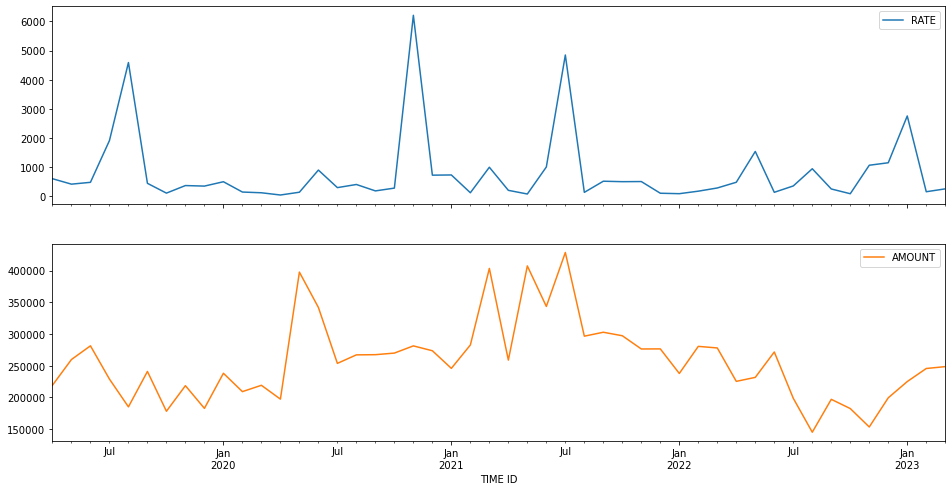

In [131]:
resample_multi_df.plot(subplots=True)

In [132]:
#Augmented Dickey-Fuller Test (ADF Test) to check the stationary of each variable in the dataset
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, sig=0.05, name=''):
    res = adfuller(series, autolag='AIC')
    p_value = round(res[1], 3)

    if p_value <= sig:
        print(f" {name} : P-Value = {p_value} => Stationary. ")
    else:
        print(f" {name} : P-Value = {p_value} => Non-stationary.")

for name, column in resample_multi_df.iteritems():
    adfuller_test(column, name=column.name)

 RATE : P-Value = 0.0 => Stationary. 
 AMOUNT : P-Value = 0.164 => Non-stationary.


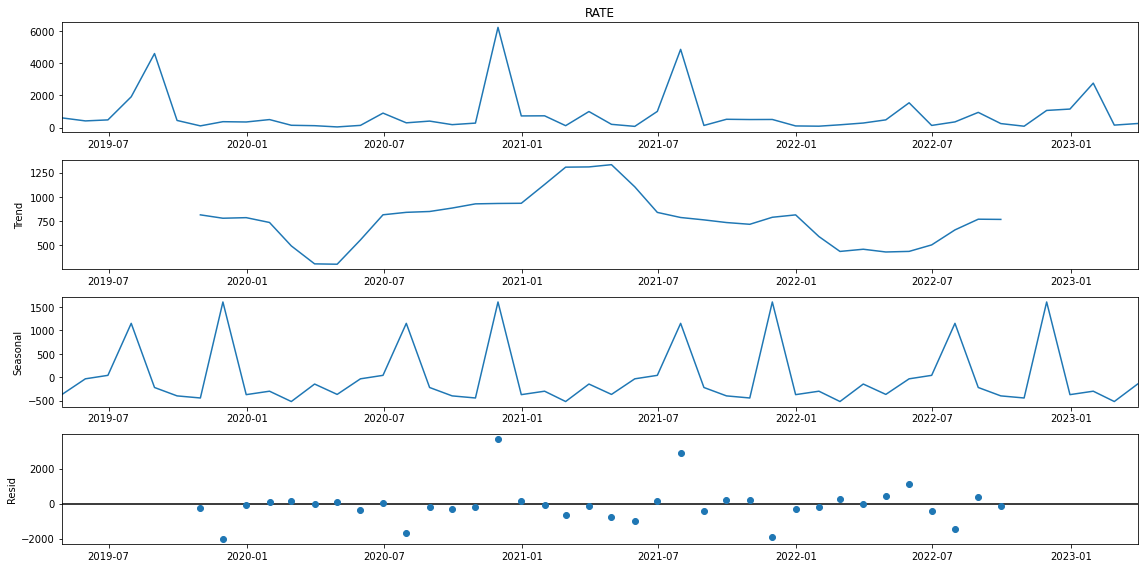

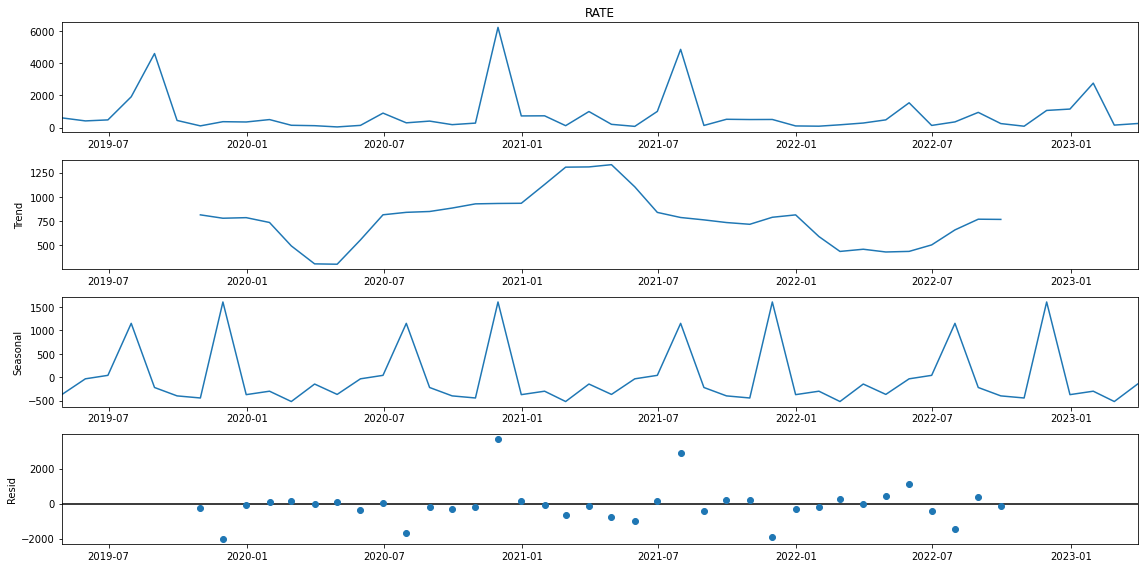

In [133]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(resample_multi_df['RATE'])
result.plot()

In [134]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [135]:
model = pm.auto_arima(resample_multi_df['RATE'],
                        m=12, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=829.058, Time=0.55 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=825.525, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=829.133, Time=0.22 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=829.179, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=840.064, Time=0.06 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=827.148, Time=0.18 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=827.064, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=827.490, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=827.563, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=829.432, Time=0.19 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.955 seconds


In [136]:
train=resample_multi_df[(resample_multi_df.index.get_level_values(0) >= '2019-04-01') & (resample_multi_df.index.get_level_values(0) <= '2022-8-01')]
test=resample_multi_df[(resample_multi_df.index.get_level_values(0) > '2022-8-01')]
test

,RATE,AMOUNT
TIME ID,,
2022-08-31,946.372406,145139.699248
2022-09-30,253.011867,196961.283333
2022-10-31,89.548052,182427.420779
2022-11-30,1067.064729,153406.045736
2022-12-31,1152.016712,199387.450274
2023-01-31,2757.306619,224979.793165
2023-02-28,158.101439,245564.310606
2023-03-31,256.505097,248530.587806


In [137]:
model.fit(train['RATE'])

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True)

<AxesSubplot:xlabel='TIME ID'>

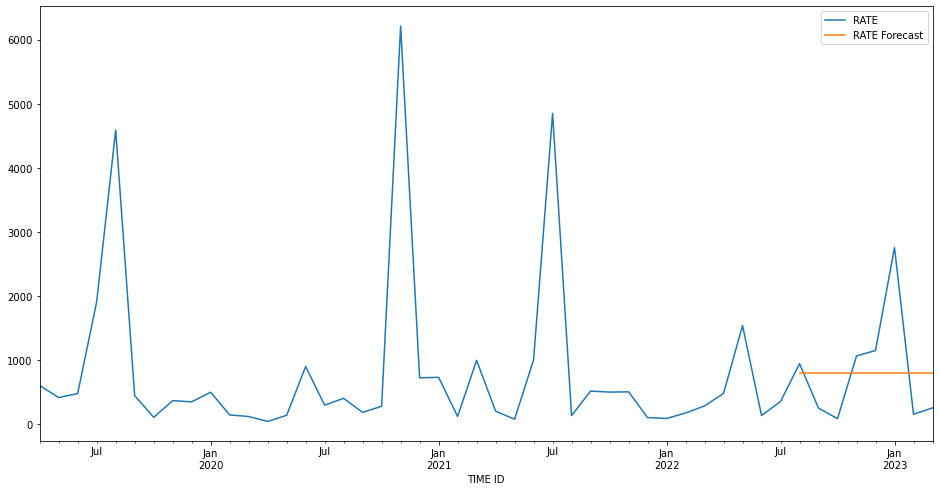

In [138]:
forecast=model.predict(n_periods=9, return_conf_int=True)
forecast_df = pd.DataFrame(forecast[0],index = test.index,columns=['RATE Forecast'])
pd.concat([resample_multi_df['RATE'],forecast_df],axis=1).plot()

In [139]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse,
            'corr':corr, 'minmax':minmax})

In [140]:
print(pd.DataFrame(dict( rate = test['RATE'].values, rate_predict = forecast_df['RATE Predict'].values)))
print('\n')
print(pd.DataFrame(forecast_accuracy(forecast_df['RATE Predict'].values, test['RATE'].values).items(), columns=['Metrics', 'Value']))

KeyError: 'RATE Predict'